<a href="https://colab.research.google.com/github/TrevorIkky/L1-GradientDescent/blob/main/L1_GradientDecent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
AVG_PRICE = 50
AVG_SIZE = 4
STANDARD_DEVIATION = 1
P = np.random.normal(AVG_PRICE, STANDARD_DEVIATION, size=100)
S = np.random.normal(AVG_SIZE, STANDARD_DEVIATION , size=100)

In [ ]:
def batch(ds, batch_size):
  assert((len(ds) % batch_size ) == 0)
  return ds.reshape((-1, batch_size))

P = batch(P, 4)
S = batch(S, 4)

print(f'Shape {P.shape}')

Shape (25, 4)


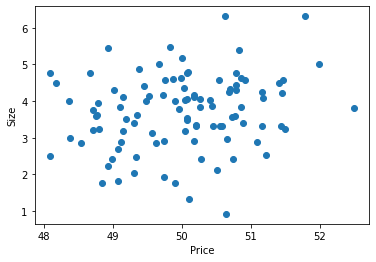

In [ ]:
plt.scatter(P, S)
plt.xlabel('Price')
plt.ylabel('Size')
plt.show()

#Partial Derivatives of M and C
##Partial Derivative of M
MSE loss:<br><br>
$f(x) = \frac{1}{n}\sum_{i=0}^{n}(y_{i}^{t}-(mx_{i}+c))^2$<br><br>
Ignore $\frac{1}{n}\sum_{i=0}^{n}$ <br><br>
$f(x) = (y_{i}^{t}-(mx_{i}+c))^2$ <br><br>
Let $u = y_{i}^{t}-(mx_{i}+c)$ <br><br>
$f(x) = (u)^2$ <br><br>
$\frac{\partial f(x)}{\partial m} = \frac{\partial f(x)}{\partial u} * \frac{\partial u}{\partial m}$ <br><br>
$\frac{\partial f(x)}{\partial m} = 2u * - {x_i} $ <br><br>
$\frac{\partial f(x)}{\partial m} = 2(y_{i}^{t}-(mx_{i}+c)) * - {x_i} $ <br><br>
Including $\frac{1}{n}\sum_{i=0}^{n}$ <br><br>
$\frac{\partial f(x)}{\partial m} = \frac{2}{n}\sum_{i=0}^{n} - {x_i} (y_{i}^{t}-(mx_{i}+c)) $ <br><br>
##Partial Derivative of C

$f(x) = \frac{1}{n}\sum_{i=0}^{n}(y_{i}^{t}-(mx_{i}+c))^2$<br><br>
Ignore $\frac{1}{n}\sum_{i=0}^{n}$ <br><br>
$f(x) = (y_{i}^{t}-(mx_{i}+c))^2$ <br><br>
Let $u = y_{i}^{t}-(mx_{i}+c)$ <br><br>
$f(x) = (u)^2$ <br><br>
$\frac{\partial f(x)}{\partial c} = \frac{\partial f(x)}{\partial u} * \frac{\partial u}{\partial c}$ <br><br>
$\frac{\partial f(x)}{\partial m} = 2u * - {1} $ <br><br>
$u = y_{i}^{t}-(mx_{i}+c)$ and Including $\frac{1}{n}\sum_{i=0}^{n}$ <br><br>
$\frac{\partial f(x)}{\partial m} = \frac{2}{n}\sum_{i=0}^{n} {-1} (y_{i}^{t}-(mx_{i}+c)) $ <br><br>

In [ ]:
"""
X axis = Size
Y axis = Price
f(n) = mx + c
"""

lr = 1e-2

def apply_gradient(m, c, x, y_true, y_pred):
  # dm = sum(-x (y - mx+ c)) & scale 2 / n
  # dc = sum (-1(y - mx + c )) & scale 2 / n
  dm = 2 * (-x * (y_true - y_pred)).mean(axis=0)
  dc = 2 * (-1 * (y_true - y_pred)).mean(axis=0)
  m = m - (lr * dm)
  c = c - (lr * dc)
  return m, c

#Mean Squared Error
$L(m, c)= \frac{1}{n}\sum_{i=0}^{n}(y_{i}^{t} - mx_{i})^2$

In [ ]:
def compute_loss(predicted_price, actual_price):
 return np.square(actual_price - predicted_price).mean(axis=0)

In [ ]:
def plot_best_fit(m , c):
  plt_price = []
  for p in P:
    plt_price.append(((m * p) + c))
  plt.scatter(P, S, label='True Values')
  plt.scatter(plt_price, S, color="red", label='Predicted Values')
  plt.xlabel('Price')
  plt.ylabel('Size')
  plt.show()

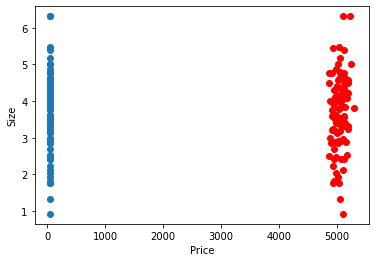

This shows the current values of m: 100 & c: 50 are over predicting the price


In [ ]:
"""
X axis = Size
Y axis = Price
f(n) = mx + c"""

EPOCHS = 2000
m = 100
c = 50


loss_metric = []
mv = []
cv = []

plot_best_fit(m, c)
print(f'This shows the current values of m: {m} & c: {c} are over predicting the price')

In [ ]:
"""Implement training loop"""
for e in range(EPOCHS): 
  for i, (price, size) in enumerate(zip(P, S)):
    predicted_price = np.add(np.multiply(m, size), c)
    loss = compute_loss(predicted_price, price)
    loss_metric.append(loss)
    adj_m, adj_c = apply_gradient(m, c, size, price, predicted_price)
    m = adj_m
    c = adj_c
    mv.append(m)
    cv.append(c)
    avg_loss = sum(loss_metric) / len(loss_metric)
    if e % 10 == 0:
      print('Epoch {:03d}, Loss {:.3f}'.format(e, avg_loss))

Streaming output truncated to the last 5000 lines.
Epoch 000, Loss 164114.238
Epoch 000, Loss 102163.027
Epoch 000, Loss 80266.025
Epoch 000, Loss 65518.980
Epoch 000, Loss 55329.562
Epoch 000, Loss 46605.952
Epoch 000, Loss 40135.477
Epoch 000, Loss 35126.541
Epoch 000, Loss 31277.930
Epoch 000, Loss 28159.866
Epoch 000, Loss 25603.584
Epoch 000, Loss 23474.069
Epoch 000, Loss 21669.159
Epoch 000, Loss 20124.135
Epoch 000, Loss 18788.909
Epoch 000, Loss 17615.007
Epoch 000, Loss 16580.213
Epoch 000, Loss 15659.797
Epoch 000, Loss 14839.525
Epoch 000, Loss 14098.001
Epoch 000, Loss 13428.429
Epoch 000, Loss 12819.325
Epoch 000, Loss 12265.888
Epoch 000, Loss 11756.303
Epoch 000, Loss 11287.127
Epoch 010, Loss 1148.899
Epoch 010, Loss 1144.464
Epoch 010, Loss 1139.998
Epoch 010, Loss 1135.583
Epoch 010, Loss 1131.245
Epoch 010, Loss 1126.908
Epoch 010, Loss 1122.539
Epoch 010, Loss 1118.340
Epoch 010, Loss 1114.070
Epoch 010, Loss 1109.834
Epoch 010, Loss 1105.666
Epoch 010, Loss 1101.5

In [ ]:
print(f'M is now {m}, C is now {c}')

M is now 0.23356952344505347, C is now 49.17305495563579


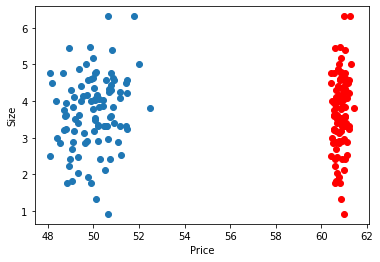

By adjusting the values of m & C the blue dots are starting to appear 
less like a straight line, Also the predicted price by the model dropped from 5000 to the 60's range


In [ ]:
plot_best_fit(m, c)
print(f"By adjusting the values of m & C the blue dots are starting to appear \nless like a straight line, Also the predicted price by the model dropped from 5000 to the 60's range")